### Sentiment Classification with Naive Bayes

In [1]:
import re
from collections import Counter
 
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
## load data
 
f = open('sentiment_data.pkl', 'rb')
train_positive, train_negative, test_positive, test_negative = pickle.load(f)
f.close()
 
print('Data description ... ')
print(len(train_positive), len(train_negative), len(test_positive), len(test_negative))
print('='*120)
print(train_positive[:10])
print('='*120)
print(train_negative[:10])
print('='*120)

Data description ... 
2881 2617 721 655
['With Dirty Deeds , David Caesar has stepped into the mainstream of filmmaking with an assurance worthy of international acclaim and with every cinematic tool well under his control -- driven by a natural sense for what works on screen .'
 "Still , the updated Dickensian sensibility of writer Craig Bartlett 's story is appealing ."
 'Forget about one Oscar nomination for Julianne Moore this year - she should get all five .'
 'and your reward will be a thoughtful , emotional movie experience .'
 'In the end there is one word that best describes this film : honest .'
 'Deserves a place of honor next to Nanook as a landmark in film history .'
 'This movie is to be cherished .'
 '... Wallace is smart to vary the pitch of his movie , balancing deafening battle scenes with quieter domestic scenes of women back home receiving War Department telegrams .'
 'This is a fascinating film because there is no clear-cut hero and no all-out villain .'
 'Features

In [3]:
## helper functions
 
def review_tokens(review):
    return [token.lower() for token in re.findall('[A-Za-z]+', review)]

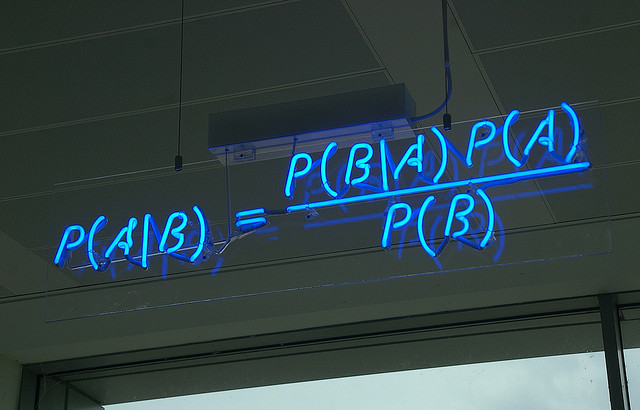

In [4]:
from IPython.display import Image
Image("naive-bayes-formula.jpg")

In [8]:
## naive bayes
 
nneg, npos = len(train_negative), len(train_positive)
 
## train
# P(positive) and P(negative)
neg_prob = 1. * nneg / ( nneg + npos )
pos_prob = 1. * npos / ( nneg + npos )
 
# P(positive|token) and P(negative|token)
pos_counts = Counter([token for review in train_positive for token in review_tokens(review)])
neg_counts = Counter([token for review in train_negative for token in review_tokens(review)])

In [9]:
# predict
all_test = np.concatenate((test_positive, test_negative))
labels = [True]*len(test_positive) + [False]*len(test_negative)
 
predictions = list()
for review in all_test:
    pos, neg = pos_prob, neg_prob
    for token in review_tokens(review):
        pos_count = pos_counts.get(token, 0) + 1
        neg_count = neg_counts.get(token, 0) + 1
        pos *= (1.0 * pos_count) / (pos_count + neg_count)
        neg *= (1.0 * neg_count) / (pos_count + neg_count)
    pos, neg = pos / (pos + neg), neg / (pos + neg)
    predictions.append(pos > neg)

In [10]:
# evaluate
print(classification_report(labels, predictions))
print('='*120)
print(confusion_matrix(labels, predictions))
print('='*120)

             precision    recall  f1-score   support

      False       0.87      0.66      0.75       655
       True       0.75      0.91      0.82       721

avg / total       0.81      0.79      0.79      1376

[[430 225]
 [ 63 658]]


In [12]:
## most positive and most negative words
vocab = set([token for review in np.concatenate((train_positive, train_negative)) for token in review_tokens(review)])
positivity = dict()
for token in vocab:
    pos_count = pos_counts.get(token.lower(), 0) + 1
    neg_count = neg_counts.get(token.lower(), 0) + 1
    if pos_count + neg_count < 10: continue
    positivity[token] = (1.0 * pos_count) / (pos_count + neg_count)
 
print('Most positive tokens', sorted(positivity.keys(), key=positivity.get, reverse=True)[:10])
print('Most negative tokens', sorted(positivity.keys(), key=positivity.get, reverse=False)[:10])

Most positive tokens ['powerful', 'solid', 'wonderful', 'touching', 'eyes', 'provides', 'inventive', 'portrait', 'refreshing', 'means']
Most negative tokens ['suffers', 'stupid', 'generic', 'car', 'poorly', 'joke', 'queen', 'mess', 'ill', 'virtually']
